<a href="https://colab.research.google.com/github/HelenVe/ASL-Recognition/blob/main/Our_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stanford 40
### Download the data
You can see the zip files if you click the Files tab (looks like a folder symbol on the left of the screen)

In [ ]:
!wget http://vision.stanford.edu/Datasets/Stanford40_JPEGImages.zip
!wget http://vision.stanford.edu/Datasets/Stanford40_ImageSplits.zip

--2022-04-17 17:07:30--  http://vision.stanford.edu/Datasets/Stanford40_JPEGImages.zip
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 304771808 (291M) [application/zip]
Saving to: ‘Stanford40_JPEGImages.zip’

Stanford40_JPEGImag 100%[===================>] 290.65M  5.49MB/s    in 70s     

2022-04-17 17:08:39 (4.17 MB/s) - ‘Stanford40_JPEGImages.zip’ saved [304771808/304771808]

--2022-04-17 17:08:40--  http://vision.stanford.edu/Datasets/Stanford40_ImageSplits.zip
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62010 (61K) [application/zip]
Saving to: ‘Stanford40_ImageSplits.zip’

Stanford40_ImageSpl 100%[===================>]  60.56K  --.-KB/s    in 0.06s   

2022-0

### Unzip it

In [ ]:
!unzip Stanford40_JPEGImages.zip -d Stanford40/
!unzip Stanford40_ImageSplits.zip -d Stanford40/

Streaming output truncated to the last 5000 lines.
  inflating: Stanford40/JPEGImages/phoning_213.jpg  
  inflating: Stanford40/JPEGImages/phoning_214.jpg  
  inflating: Stanford40/JPEGImages/phoning_215.jpg  
  inflating: Stanford40/JPEGImages/phoning_216.jpg  
  inflating: Stanford40/JPEGImages/phoning_217.jpg  
  inflating: Stanford40/JPEGImages/phoning_218.jpg  
  inflating: Stanford40/JPEGImages/phoning_219.jpg  
  inflating: Stanford40/JPEGImages/phoning_220.jpg  
  inflating: Stanford40/JPEGImages/phoning_221.jpg  
  inflating: Stanford40/JPEGImages/phoning_222.jpg  
  inflating: Stanford40/JPEGImages/phoning_223.jpg  
  inflating: Stanford40/JPEGImages/phoning_224.jpg  
  inflating: Stanford40/JPEGImages/phoning_225.jpg  
  inflating: Stanford40/JPEGImages/phoning_226.jpg  
  inflating: Stanford40/JPEGImages/phoning_227.jpg  
  inflating: Stanford40/JPEGImages/phoning_228.jpg  
  inflating: Stanford40/JPEGImages/phoning_229.jpg  
  inflating: Stanford40/JPEGImages/phoning_230.j

### Read the train and test splits and also create a separate labels lists

In [ ]:
with open('Stanford40/ImageSplits/train.txt', 'r') as f:
    train_files = list(map(str.strip, f.readlines()))
    train_labels = ['_'.join(name.split('_')[:-1]) for name in train_files]
    # print(f'Train files ({len(train_files)}):\n\t{train_files}')
    # print(f'Train labels ({len(train_labels)}):\n\t{train_labels}\n')

with open('Stanford40/ImageSplits/test.txt', 'r') as f:
    test_files = list(map(str.strip, f.readlines()))
    test_labels = ['_'.join(name.split('_')[:-1]) for name in test_files]
    # print(f'Test files ({len(test_files)}):\n\t{test_files}')
    # print(f'Test labels ({len(test_labels)}):\n\t{test_labels}\n')
    
action_categories = sorted(list(set(['_'.join(name.split('_')[:-1]) for name in train_files])))
# print(f'Action categories ({len(action_categories)}):\n{action_categories}')

### Visualize a photo from the training files and also print its label

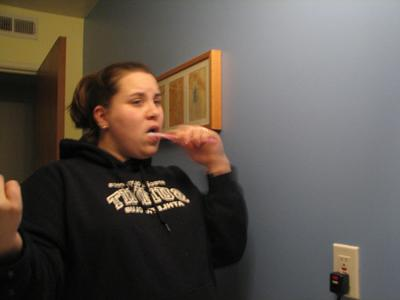

An image with the label - brushing_teeth


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image_no = 234  # change this to a number between [0, 3999] and you can see a different training image
img = cv2.imread(f'Stanford40/JPEGImages/{train_files[image_no]}')
cv2_imshow(img)
print(f'An image with the label - {train_labels[image_no]}')

# TV Human Interaction (TV-HI)
### Download the dataset

In [ ]:
!wget http://www.robots.ox.ac.uk/~alonso/data/tv_human_interactions_videos.tar.gz
!wget http://www.robots.ox.ac.uk/~alonso/data/readme.txt

--2022-04-17 17:08:58--  http://www.robots.ox.ac.uk/~alonso/data/tv_human_interactions_videos.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~alonso/data/tv_human_interactions_videos.tar.gz [following]
--2022-04-17 17:08:59--  https://www.robots.ox.ac.uk/~alonso/data/tv_human_interactions_videos.tar.gz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 163535078 (156M) [application/x-gzip]
Saving to: ‘tv_human_interactions_videos.tar.gz’

tv_human_interactio 100%[===================>] 155.96M  21.7MB/s    in 8.2s    

2022-04-17 17:09:07 (19.0 MB/s) - ‘tv_human_interactions_videos.tar.gz’ saved [163535078/163535078]

--2022-04-17 17:09:07--  http://www.robots.ox.ac.uk/~alonso/data/readme

### Untar compressed files and move the readme.txt into TV-HI folder

In [ ]:
!mkdir TV-HI
!tar -xvf  'tv_human_interactions_videos.tar.gz' -C TV-HI
!mv readme.txt 'TV-HI/readme.txt'

tv_human_interactions_videos/
tv_human_interactions_videos/negative_0001.avi
tv_human_interactions_videos/negative_0002.avi
tv_human_interactions_videos/negative_0003.avi
tv_human_interactions_videos/negative_0004.avi
tv_human_interactions_videos/negative_0005.avi
tv_human_interactions_videos/negative_0006.avi
tv_human_interactions_videos/negative_0007.avi
tv_human_interactions_videos/negative_0008.avi
tv_human_interactions_videos/negative_0009.avi
tv_human_interactions_videos/negative_0010.avi
tv_human_interactions_videos/negative_0011.avi
tv_human_interactions_videos/negative_0012.avi
tv_human_interactions_videos/negative_0013.avi
tv_human_interactions_videos/negative_0014.avi
tv_human_interactions_videos/negative_0015.avi
tv_human_interactions_videos/negative_0016.avi
tv_human_interactions_videos/negative_0017.avi
tv_human_interactions_videos/negative_0018.avi
tv_human_interactions_videos/negative_0019.avi
tv_human_interactions_videos/negative_0020.avi
tv_human_interactions_videos/n

### Let us copy the Set 1 and Set 2 indices from the readme.txt and create our lists
You can check the readme.txt in TV-HI directory which you can find from the Files tab on the left (little Folder symbol). If you cannot see it try to refresh the Files tab (little folder symbol with a circular arrow on it). Then you can double click readme.txt to see its content. You won't need to do anything with this file because the code below creates the sets and labels for you.

In [ ]:
set_1_indices = [[2,14,15,16,18,19,20,21,24,25,26,27,28,32,40,41,42,43,44,45,46,47,48,49,50],
                 [1,6,7,8,9,10,11,12,13,23,24,25,27,28,29,30,31,32,33,34,35,44,45,47,48],
                 [2,3,4,11,12,15,16,17,18,20,21,27,29,30,31,32,33,34,35,36,42,44,46,49,50],
                 [1,7,8,9,10,11,12,13,14,16,17,18,22,23,24,26,29,31,35,36,38,39,40,41,42]]
set_2_indices = [[1,3,4,5,6,7,8,9,10,11,12,13,17,22,23,29,30,31,33,34,35,36,37,38,39],
                 [2,3,4,5,14,15,16,17,18,19,20,21,22,26,36,37,38,39,40,41,42,43,46,49,50],
                 [1,5,6,7,8,9,10,13,14,19,22,23,24,25,26,28,37,38,39,40,41,43,45,47,48],
                 [2,3,4,5,6,15,19,20,21,25,27,28,30,32,33,34,37,43,44,45,46,47,48,49,50]]
classes = ['handShake', 'highFive', 'hug', 'kiss']  # we ignore the negative class

# test set
set_1 = [f'{classes[c]}_{i:04d}.avi' for c in range(len(classes)) for i in set_1_indices[c]]
set_1_label = [f'{classes[c]}' for c in range(len(classes)) for i in set_1_indices[c]]
#print(f'Set 1 to be used for test ({len(set_1)}):\n\t{set_1}')
#print(f'Set 1 labels ({len(set_1_label)}):\n\t{set_1_label}\n')

# training set
set_2 = [f'{classes[c]}_{i:04d}.avi' for c in range(len(classes)) for i in set_2_indices[c]]
set_2_label = [f'{classes[c]}' for c in range(len(classes)) for i in set_2_indices[c]]
#print(f'Set 2 to be used for train and validation ({len(set_2)}):\n\t{set_2}')
#print(f'Set 2 labels ({len(set_2_label)}):\n\t{set_2_label}')


In [ ]:
# from moviepy.editor import *

# video_no = 55  # change this to a number between [0, 100] and you can see a different training video from Set 2

# clip=VideoFileClip(f'TV-HI/tv_human_interactions_videos/{set_2[video_no]}')
# print(f'\n\nA video with the label - {set_2_label[video_no]}\n')
# clip.ipython_display(width=280)

**Stanford-40**

In [ ]:
# Stanford has 40 classes with 180-300 images per class (total of 9532 images).
# For validation, use 10% of training data with stratification
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import cv2
import math 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout, AveragePooling2D, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from moviepy.editor import *

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3080192/45929032 bytes (6.7%)6422528/45929032 bytes (14.0%)9846784/45929032 bytes (21.4%)13164544/45929032 bytes (28.7%)16678912/45929032 bytes (36.3%)20152320/45929032 bytes (43.9%)23552000/45929032 bytes (51.3%)26910720/45929032 bytes (58.6%)30146560/45929032 bytes (65.6%)33095680/45929032 bytes (72.1%)36069376/45929032 bytes (78.5%)39215104/45929032 bytes (85.4%)

In [ ]:
# function that reads the images and resizes them 
# The labels are encoded and converted to one-hot encoding.
# The train and validaiton sets are returned
def preprocess_data(IMG_SIZE):
    label_enc = preprocessing.LabelEncoder()
    labels = label_enc.fit_transform(train_labels)  # transform to numbers
    train_images = []
    for img in train_files:
        im = cv2.imread(f'Stanford40/JPEGImages/' + img)
        im = cv2.resize(im, (IMG_SIZE, IMG_SIZE)) # resize to the correct size for EfficientNet
        train_images.append(im)
    x_train, x_val, y_train, y_val = train_test_split(train_images, labels, test_size=0.1, stratify=train_labels)
    x_train, x_val = np.array(x_train), np.array(x_val)
    y_train = to_categorical(y_train)
    y_val = to_categorical(y_val)
    return x_train, x_val, y_train, y_val


# https://proceedings.neurips.cc/paper/2014/file/00ec53c4682d36f5c4359f4ae7bd7ba1-Paper.pdf

def spatial_model():
    model = Sequential()
    model.add(Conv2D(128, kernel_size=(3,3), input_shape=(112,112,3), activation="relu"))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())

    model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())

    model.add(Conv2D(32, kernel_size=(3,3), activation="relu"))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(40, activation="softmax"))
    model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=["accuracy"])
    model.summary()
    return model


# plot the training and validation history
def plot_history(model, title, color):
    accuracy = model.history.history["accuracy"]
    val_accuracy = model.history.history["val_accuracy"]
    loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, color, label='Training accuracy')
    plt.plot(epochs, val_accuracy, color+"--", label='Validation accuracy')
    plt.title('Training and validation accuracy for ' + title)
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, color, label='Training loss')
    plt.plot(epochs, val_loss, color+"--", label='Validation loss')
    plt.title('Training and validation loss for ' + title)
    plt.legend()
    plt.show()


In [ ]:
x_train, x_val, y_train, y_val = preprocess_data(IMG_SIZE=112)
print(x_train.shape)

(3600, 112, 112, 3)


A good combination of parameters is:
Adam(learning rate=1e-3), batch size=64, IMG_SIZE=112

Train the spatial model.


In [ ]:
def train_spatial():
  model = spatial_model()
  callbacks = [EarlyStopping(monitor="val_loss", mode="min", patience=5, verbose=1),
              ModelCheckpoint(monitor="val_loss", mode="min", filepath="Stanford40_ckpt", save_best_only=True,
                              save_weights_only=False, verbose=1)]

  hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), callbacks=callbacks, epochs=20, batch_size=128, verbose=1)
  model.save("Stanford40model")
  plot_history(model, "Stanford 40 CNN", color="r")

In [ ]:
train_spatial()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 110, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 55, 55, 128)       0         
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 53, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 64)       0

**TV-HI**

**Transfer Learning **

In [ ]:
def get_middle_frame(which_set):
  """
  Function that calculates and saves the middle frame from TV_HI
  Saved inside tv_human_interactions_videos/middle_frame folder
  :param which_set: from the TV_HI set choose set_1 or set_2
  :return:
  """
  img_dir = '/content/TV-HI/tv_human_interactions_videos/'
  save_dir = img_dir+"middle_frames/"
  if not os.path.isdir(save_dir):
    os.mkdir(save_dir)

  for video_no, video in enumerate(which_set):
    clip = img_dir + video
    label = set_2_label[video_no]
    cap = cv2.VideoCapture(clip)
    middle_frame = int(cap.get(cv2.CAP_PROP_FRAME_COUNT) / 2)

    success, image = cap.read()
    count = 0
    success = True
    while success:
        success, image = cap.read()
        # when finding the middle frame
        if count == middle_frame:
            cv2.imwrite(save_dir+video.replace(".avi", '')+"_middle.jpg", image)
        count += 1

In [ ]:


def preprocess_opticalFlow(save_dir):
  """
  Reads the OF images and converts to numpy array.
  Encodes the labels into categorical vectors
  :param save_dir: the directory with the optical flow images
  :return: optical flow based train and validation set
  """
  optical_flow_data = []
  for folder in sorted(os.listdir(save_dir)):
    of_images = [] # optical flow images
    filepath = save_dir+folder+"/"
    for image in os.listdir(filepath):
      img_path = filepath+image
      im = cv2.imread(img_path)
      im = cv2.resize(im, (112, 112))
      of_images.append(im)
    optical_flow_data.append(np.array(of_images)) # append all optical flow images to make training data array 

  label_enc = preprocessing.LabelEncoder()
  optical_flow_labels = label_enc.fit_transform(set_2_label)  # transform to numbers
  x_train, x_val, y_train, y_val = train_test_split(optical_flow_data, optical_flow_labels, test_size=0.15, stratify=set_2_label)

  return x_train, x_val, y_train, y_val

# model found here: https://iopscience.iop.org/article/10.1088/1742-6596/1827/1/012138/pdf
def of_model():
  model = Sequential()
  model.add(Conv2D(96, kernel_size=(7,7), strides=(2,2), padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(256, kernel_size=(5,5), strides=(2,2), padding="same"))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(512, kernel_size=(3,3), strides=(1,1), padding="same"))
  model.add(Conv2D(512, kernel_size=(3,3), strides=(1,1), padding="same"))
  model.add(Conv2D(512, kernel_size=(3,3), strides=(1,1), padding="same"))
  model.add(MaxPooling2D((2,2)))
  model.add(Dense(4096, activation="relu"))
  model.add(Dropout(0.9))
  model.add(Dense(2048, activation="relu"))
  model.add(Dropout(0.9))
  model.add(Dense(4, activation="softmax"))
  model.compile(optimizer=SGD(learning_rate=0.01,momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
  return model
 

def train_temporal_model(save_dir):
  """
  Calls optical flow calculation, preprocesses the optical flow data to split into train and validation and performs
  the training
  :param save_dir: The optical flow directory 
  :return: 
  """
  
  if not os.path.isdir(save_dir):
    os.mkdir(save_dir)
  optical_flow_calculation(img_dir, save_dir)

  x_train, x_val, y_train, y_val = preprocess_opticalFlow(save_dir)

  temporal_model = of_model()
  callbacks = [EarlyStopping(monitor="val_loss", mode="min", patience=5, verbose=1),
                ModelCheckpoint(monitor="val_loss", mode="min", filepath="TV_HI_OF_ckpt", save_best_only=True,
                                save_weights_only=False, verbose=1)]

  hist = temporal_model.fit(x_train, y_train, validation_data=(x_val, y_val), callbacks=callbacks, epochs=20, batch_size=32,
                      verbose=1)
  of_model.save("TV_HI_OF")
  plot_history(temporal_model, "TV-HI Optical Flow")



*Optical* Flow Stuff

In [ ]:
from google.colab.patches import cv2_imshow

# Function that returns how many frames we have to skip saving in order to always save 16 optical flow frames.
# Instead of saving the first or the last N frames, we try and take the ones that should be representative.
# Mean frame count per video is 103, Max frames is 301, min is 23

def skip_frame(frame_count):
  # because during optical the 1st image is used for calculation anyway
  skip = (frame_count-1) / 16 
  
  if skip%2 != 0: # is the number is odd
    skip = math.floor(skip)
  return skip 



# function that calculates the dense optical flow for the selected video frames  and saves it to corresponding folders
def optical_flow_calculation(img_dir, save_dir):

  for video_no, video in enumerate(set_2):
    count = 0 # how many frames we have seen so far - gets back to 0 at some point
    looped = 0 # actual counter for the number of frames - used to save the image name

    clip = img_dir + video
    label = set_2_label[video_no]

    cap = cv2.VideoCapture(clip)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) #total number of frames

    save_every = skip_frame(frame_count) # every how many frames we have to save the optical flow image 
    print("Saving every "+ str(save_every) + "/" + str(frame_count) + " frames")
    ret_flag, first_frame = cap.read()
    # count += 1
    # looped+=1
    # Converts frame to grayscale because we only need the luminance channel for detecting edges - less computationally xpensive
    prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
      
    # Creates an image filled with zero# intensities with the same dimensions as the frame and set saturation to max
    mask = np.zeros_like(first_frame)
    mask[..., 1] = 255

    while(cap.isOpened()):
      ret_flag, frame = cap.read()
      if not ret_flag:
        print('No frames available!')
        break
      count += 1
      looped+=1
      # cv2_imshow(frame)
      if frame != []:

        # Converts each frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # save every N frames and restart counter
        if count == save_every:
          flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
          
          # Computes the magnitude and angle of the 2D vectors
          magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
          
          # Sets image hue according to the optical flow  direction
          mask[..., 0] = angle * 180 / np.pi / 2
          
          # Sets image value according to the optical flow magnitude (normalized)
          mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
          rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)

          # name of the path to save the optical flow images
          save_path = save_dir + video.replace('.avi', '') + "/"
          
          if not os.path.isdir(save_path):
            os.mkdir(save_path)
          
          # save x, y flows to r and g channels, since opencv reverses the colors
          cv2.imwrite(save_path + str(looped).zfill(4) +'.png', rgb)
          count = 0
      
      prev_gray = gray

  cap.release()
  cv2.destroyAllWindows()

In [ ]:
get_middle_frame(set_2)

In [ ]:
def tvhi_model():
  inputs = Input(shape=(112, 112, 3))
  base_model = load_model('Stanford40model')
 # base_model.trainable = False
  for layers in base_model.layers[:-1]:
    layers.trainable=False
  
  new_model = base_model.output
  new_model = Flatten()(new_model)
  outputs = Dense(4, activation="softmax")(new_model)

  model = Model(inputs=base_model.input, outputs=outputs)
  model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=["accuracy"])
  model.summary()
  return model

def get_tvhi_frames(path):
  data, labels = [],[]
  for image_no, image in enumerate(sorted(os.listdir(path))):
    
    frame = cv2.imread(path+"/"+image)
    frame = cv2.resize(frame, (112,112))
    label = set_2_label[image_no]
    data.append(frame)
    labels.append(label)
  data = np.array(data)
  labels = np.array(labels)

  label_enc = preprocessing.LabelEncoder()
  labels = label_enc.fit_transform(labels) 


  return data, labels

def train_tvhi():
  model = tvhi_model()
  callbacks = [EarlyStopping(monitor="val_loss", mode="min", patience=5, verbose=1),
              ModelCheckpoint(monitor="val_loss", mode="min", filepath="Stanford40_ckpt", save_best_only=True,
                              save_weights_only=False, verbose=1)]

  x_train_tvhi, y_train_tvhi = get_tvhi_frames("/content/TV-HI/tv_human_interactions_videos/middle_frames/")
  print(x_train_tvhi.shape, y_train_tvhi.shape)
  hist = model.fit(x_train_tvhi, y_train_tvhi, callbacks=callbacks, epochs=20, batch_size=128, verbose=1)
  model.save("TV_HImodel")
  plot_history(model, "TV_HI CNN", color="b")


In [ ]:
train_tvhi()

In [ ]:
import os
img_dir = '/content/TV-HI/tv_human_interactions_videos/'
save_dir = '/content/TV-HI/optical_flow/'

if not os.path.isdir(save_dir):
  os.mkdir(save_dir)
optical_flow_calculation(img_dir, save_dir)

Saving every 3/50 frames
No frames available!
Saving every 4/67 frames
No frames available!
Saving every 3/58 frames
No frames available!
Saving every 14/232 frames
No frames available!
Saving every 7/117 frames
No frames available!
Saving every 4/75 frames
No frames available!
Saving every 4.0/65 frames
No frames available!
Saving every 7/123 frames
No frames available!
Saving every 11/185 frames
No frames available!
Saving every 5/91 frames
No frames available!
Saving every 6/98 frames
No frames available!
Saving every 7/113 frames
No frames available!
Saving every 12/198 frames
No frames available!
Saving every 4/78 frames
No frames available!
Saving every 2/36 frames
No frames available!
Saving every 2/34 frames
No frames available!
Saving every 4/69 frames
No frames available!
Saving every 8/132 frames
No frames available!
Saving every 5/89 frames
No frames available!
Saving every 7/120 frames
No frames available!
Saving every 1/24 frames
No frames available!
Saving every 18/290 f

In [ ]:
!zip -r /content/file.zip /content/TV-HI/optical_flow


  adding: content/TV-HI/optical_flow/ (stored 0%)
  adding: content/TV-HI/optical_flow/kiss_0021/ (stored 0%)
  adding: content/TV-HI/optical_flow/kiss_0021/0051.png (deflated 3%)
  adding: content/TV-HI/optical_flow/kiss_0021/0036.png (deflated 11%)
  adding: content/TV-HI/optical_flow/kiss_0021/0018.png (deflated 4%)
  adding: content/TV-HI/optical_flow/kiss_0021/0009.png (deflated 12%)
  adding: content/TV-HI/optical_flow/kiss_0021/0039.png (deflated 4%)
  adding: content/TV-HI/optical_flow/kiss_0021/0060.png (deflated 4%)
  adding: content/TV-HI/optical_flow/kiss_0021/0021.png (deflated 11%)
  adding: content/TV-HI/optical_flow/kiss_0021/0027.png (deflated 10%)
  adding: content/TV-HI/optical_flow/kiss_0021/0003.png (deflated 13%)
  adding: content/TV-HI/optical_flow/kiss_0021/0006.png (deflated 10%)
  adding: content/TV-HI/optical_flow/kiss_0021/0024.png (deflated 8%)
  adding: content/TV-HI/optical_flow/kiss_0021/0048.png (deflated 4%)
  adding: content/TV-HI/optical_flow/kiss_00

In [ ]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>